In [3]:
import pandas as pd
flights_df = pd.read_csv('flights.csv')
airports_df = pd.read_csv('airports.csv')
flights_df.head()

D:\pyLabs\GRIGORY\Python\WPy64-3870\python-3.8.7.amd64\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (7,8) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,...,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
0,2015,1,1,4,AS,98,N407AS,ANC,SEA,5,...,408.0,-22.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
1,2015,1,1,4,AA,2336,N3KUAA,LAX,PBI,10,...,741.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
2,2015,1,1,4,US,840,N171US,SFO,CLT,20,...,811.0,5.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
3,2015,1,1,4,AA,258,N3HYAA,LAX,MIA,20,...,756.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,2015,1,1,4,AS,135,N527AS,SEA,ANC,25,...,259.0,-21.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [31]:
#Количество отмененных рейсов
cancelled_df = flights_df['CANCELLED']
cancelled_df[cancelled_df == 1].count()

89884

In [5]:
#Аэропорт с наиболее часто отменяемыми рейсами
print(flights_df[flights_df.CANCELLED == 1][['DESTINATION_AIRPORT']].value_counts())

DESTINATION_AIRPORT
ORD                    9273
DFW                    6749
LGA                    4418
EWR                    3350
ATL                    2715
                       ... 
11049                     1
11066                     1
11140                     1
11267                     1
10135                     1
Length: 595, dtype: int64


In [6]:
#Коэффициент корреляции Пирсона и Спирмена между отменой рейса и днём недели, месяцем, авиакомпанией, аэропортом.

#Коэф. корреляции Пирсона

print(flights_df[['DAY_OF_WEEK', 'CANCELLED']].corr('pearson'))

print(flights_df[['MONTH', 'CANCELLED']].corr('pearson'))

print(flights_df[['AIRLINE', 'CANCELLED']].corr('pearson'))

print(flights_df[['ORIGIN_AIRPORT', 'CANCELLED']].corr('pearson'))

#Коэф. корреляции Спирмена

print(flights_df[['DAY_OF_WEEK', 'CANCELLED']].corr('spearman'))

print(flights_df[['MONTH', 'CANCELLED']].corr('spearman'))

print(flights_df[['AIRLINE', 'CANCELLED']].corr('spearman'))

print(flights_df[['ORIGIN_AIRPORT', 'CANCELLED']].corr('spearman'))


             DAY_OF_WEEK  CANCELLED
DAY_OF_WEEK      1.00000   -0.02223
CANCELLED       -0.02223    1.00000
              MONTH  CANCELLED
MONTH      1.000000  -0.055043
CANCELLED -0.055043   1.000000
           CANCELLED
CANCELLED        1.0
           CANCELLED
CANCELLED        1.0
             DAY_OF_WEEK  CANCELLED
DAY_OF_WEEK     1.000000  -0.022768
CANCELLED      -0.022768   1.000000
              MONTH  CANCELLED
MONTH      1.000000  -0.055133
CANCELLED -0.055133   1.000000
           CANCELLED
CANCELLED        1.0
           CANCELLED
CANCELLED        1.0


In [7]:
#Для трех компаний количество рейсов, количество отменённых рейсов, количество перенаправленных рейсов.
print(flights_df[flights_df.AIRLINE == 'AS'][['DIVERTED']].value_counts())
print(flights_df[flights_df.AIRLINE == 'AS'][['CANCELLED']].value_counts())

print(flights_df[flights_df.AIRLINE == 'AA'][['DIVERTED']].value_counts())
print(flights_df[flights_df.AIRLINE == 'AA'][['CANCELLED']].value_counts())

print(flights_df[flights_df.AIRLINE == 'US'][['DIVERTED']].value_counts())
print(flights_df[flights_df.AIRLINE == 'US'][['CANCELLED']].value_counts())

print(flights_df['AIRLINE'][flights_df.AIRLINE == 'AS'].value_counts())
print(flights_df['AIRLINE'][flights_df.AIRLINE == 'AA'].value_counts())
print(flights_df['AIRLINE'][flights_df.AIRLINE == 'US'].value_counts())

DIVERTED
0           172108
1              413
dtype: int64
CANCELLED
0            171852
1               669
dtype: int64
DIVERTED
0           723854
1             2130
dtype: int64
CANCELLED
0            715065
1             10919
dtype: int64
DIVERTED
0           198290
1              425
dtype: int64
CANCELLED
0            194648
1              4067
dtype: int64
AS    172521
Name: AIRLINE, dtype: int64
AA    725984
Name: AIRLINE, dtype: int64
US    198715
Name: AIRLINE, dtype: int64


In [8]:
flights_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5819079 entries, 0 to 5819078
Data columns (total 31 columns):
 #   Column               Dtype  
---  ------               -----  
 0   YEAR                 int64  
 1   MONTH                int64  
 2   DAY                  int64  
 3   DAY_OF_WEEK          int64  
 4   AIRLINE              object 
 5   FLIGHT_NUMBER        int64  
 6   TAIL_NUMBER          object 
 7   ORIGIN_AIRPORT       object 
 8   DESTINATION_AIRPORT  object 
 9   SCHEDULED_DEPARTURE  int64  
 10  DEPARTURE_TIME       float64
 11  DEPARTURE_DELAY      float64
 12  TAXI_OUT             float64
 13  WHEELS_OFF           float64
 14  SCHEDULED_TIME       float64
 15  ELAPSED_TIME         float64
 16  AIR_TIME             float64
 17  DISTANCE             int64  
 18  WHEELS_ON            float64
 19  TAXI_IN              float64
 20  SCHEDULED_ARRIVAL    int64  
 21  ARRIVAL_TIME         float64
 22  ARRIVAL_DELAY        float64
 23  DIVERTED             int64  
 24

In [9]:
flights_df['VELOCITY'] = flights_df['DISTANCE'] / flights_df['ELAPSED_TIME']
flights_df.head()

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,...,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY,VELOCITY
0,2015,1,1,4,AS,98,N407AS,ANC,SEA,5,...,-22.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,7.463918
1,2015,1,1,4,AA,2336,N3KUAA,LAX,PBI,10,...,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,8.351254
2,2015,1,1,4,US,840,N171US,SFO,CLT,20,...,5.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,7.836177
3,2015,1,1,4,AA,258,N3HYAA,LAX,MIA,20,...,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,8.334520
4,2015,1,1,4,AS,135,N527AS,SEA,ANC,25,...,-21.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,6.734884


In [10]:
#Среднее значение скорости для всех рейсов 
flights_df['VELOCITY'].mean()

5.478458995696542

In [11]:
#Среднее значение скорости для авиакомпании AS
print(flights_df[flights_df.AIRLINE == 'AS'][['VELOCITY']].mean())
#Среднее значение скорости для авиакомпании AA
print(flights_df[flights_df.AIRLINE == 'AA'][['VELOCITY']].mean())
#Среднее значение скорости для авиакомпании US
print(flights_df[flights_df.AIRLINE == 'US'][['VELOCITY']].mean())

VELOCITY    6.236227
dtype: float64
VELOCITY    5.844235
dtype: float64
VELOCITY    5.490478
dtype: float64


In [12]:
#Построение тепловой карты частоты отмены рейсов из аэропорта ANC в зависимости от дня недели
sub_df = flights_df.drop(flights_df[(flights_df.ORIGIN_AIRPORT != 'ANC')].index)
sub_df.sort_values('DAY_OF_WEEK',ascending=True)


,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,...,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY,VELOCITY
2161421,2015,5,18,1,AS,122,N644AS,ANC,PDX,30,...,-25.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,7.521951
4353547,2015,9,28,1,AS,106,N584AS,ANC,SEA,2345,...,-12.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,7.387755
4353522,2015,9,28,1,AS,138,N532AS,ANC,ORD,2325,...,-11.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,8.108262
4353514,2015,9,28,1,AS,150,N588AS,ANC,LAX,2320,...,-25.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,7.688525
4353469,2015,9,28,1,AS,167,N791AS,ANC,FAI,2305,...,-2.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,5.220000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1580420,2015,4,12,7,AS,92,N523AS,ANC,SEA,130,...,-12.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,7.541667
1580404,2015,4,12,7,DL,822,N3745B,ANC,SEA,57,...,-23.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,7.661376
1580403,2015,4,12,7,AS,136,N713AS,ANC,SEA,55,...,-13.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,7.502591
4103134,2015,9,13,7,AS,47,N703AS,ANC,ADQ,625,...,-10.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,4.773585


In [13]:
sub_df.sort_values('DAY_OF_WEEK',ascending=True)
#Частота отмены рейсов в первый день недели
prob_df_1 = sub_df[(sub_df.DAY_OF_WEEK == 1) & (sub_df.CANCELLED == 1)]
prob_df_1_full = sub_df[(sub_df.DAY_OF_WEEK == 1)]
prob_1 = prob_df_1.shape[0]
density_1 = prob_1 / prob_df_1_full.shape[0]
print(density_1)

prob_df_2 = sub_df[(sub_df.DAY_OF_WEEK == 2) & (sub_df.CANCELLED == 1)]
prob_df_2_full = sub_df[(sub_df.DAY_OF_WEEK == 2)]
prob_2 = prob_df_1.shape[0]
density_2 = prob_2 / prob_df_2_full.shape[0]
print(density_2)

prob_df_3 = sub_df[(sub_df.DAY_OF_WEEK == 3) & (sub_df.CANCELLED == 1)]
prob_df_3_full = sub_df[(sub_df.DAY_OF_WEEK == 3)]
prob_3 = prob_df_3.shape[0]
density_3 = prob_3 / prob_df_3_full.shape[0]
print(density_3)

prob_df_4 = sub_df[(sub_df.DAY_OF_WEEK == 4) & (sub_df.CANCELLED == 1)]
prob_df_4_full = sub_df[(sub_df.DAY_OF_WEEK == 4)]
prob_4 = prob_df_4.shape[0]
density_4 = prob_4 / prob_df_4_full.shape[0]
print(density_4)

prob_df_5 = sub_df[(sub_df.DAY_OF_WEEK == 5) & (sub_df.CANCELLED == 1)]
prob_df_5_full = sub_df[(sub_df.DAY_OF_WEEK == 5)]
prob_5 = prob_df_5.shape[0]
density_5 = prob_5 / prob_df_5_full.shape[0]
print(density_5)

prob_df_6 = sub_df[(sub_df.DAY_OF_WEEK == 6) & (sub_df.CANCELLED == 1)]
prob_df_6_full = sub_df[(sub_df.DAY_OF_WEEK == 6)]
prob_6 = prob_df_6.shape[0]
density_6 = prob_6 / prob_df_6_full.shape[0]
print(density_6)

prob_df_7 = sub_df[(sub_df.DAY_OF_WEEK == 7) & (sub_df.CANCELLED == 1)]
prob_df_7_full = sub_df[(sub_df.DAY_OF_WEEK == 7)]
prob_7 = prob_df_7.shape[0]
density_7 = prob_7 / prob_df_7_full.shape[0]
print(density_7)

0.009349766255843604
0.00962800875273523
0.0073428178063331805
0.007185122569737954
0.0069084628670120895
0.007246376811594203
0.008703220191470844


In [14]:
density_df = pd.DataFrame({"CANCELLATION_DENSITY" : [density_1, density_2, density_3, density_4, density_5,
                                                   density_6, density_7], "DAY_OF_WEEK":[1, 2, 3, 4, 5,
                                                   6, 7] }, index = [1, 2, 3, 4, 5, 6, 7])
density_df

,CANCELLATION_DENSITY,DAY_OF_WEEK
1,0.009350,1
2,0.009628,2
3,0.007343,3
4,0.007185,4
5,0.006908,5
6,0.007246,6
7,0.008703,7


In [15]:
final_df = pd.merge(sub_df, density_df, how = 'inner', on = 'DAY_OF_WEEK')
final_df

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,...,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY,VELOCITY,CANCELLATION_DENSITY
0,2015,1,1,4,AS,98,N407AS,ANC,SEA,5,...,0,0,NaN,NaN,NaN,NaN,NaN,NaN,7.463918,0.007185
1,2015,1,1,4,AS,108,N309AS,ANC,SEA,45,...,0,0,NaN,NaN,NaN,NaN,NaN,NaN,7.463918,0.007185
2,2015,1,1,4,DL,1560,N3743H,ANC,SEA,45,...,0,0,NaN,NaN,NaN,NaN,NaN,NaN,7.240000,0.007185
3,2015,1,1,4,AS,122,N413AS,ANC,PDX,50,...,0,0,NaN,NaN,NaN,NaN,NaN,NaN,7.671642,0.007185
4,2015,1,1,4,AS,136,N431AS,ANC,SEA,135,...,0,1,A,NaN,NaN,NaN,NaN,NaN,NaN,0.007185
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16000,2015,12,30,3,AS,106,N795AS,ANC,SEA,2150,...,0,0,NaN,NaN,NaN,NaN,NaN,NaN,6.703704,0.007343
16001,2015,12,30,3,AS,138,N589AS,ANC,ORD,2300,...,0,0,NaN,NaN,NaN,NaN,NaN,NaN,7.630027,0.007343
16002,2015,12,30,3,AS,167,N788AS,ANC,FAI,2305,...,0,0,NaN,NaN,NaN,NaN,NaN,NaN,5.117647,0.007343
16003,2015,12,30,3,UA,1104,N27205,ANC,DEN,2335,...,0,0,NaN,NaN,NaN,NaN,NaN,NaN,7.733119,0.007343


In [16]:
import numpy as np;
import seaborn as sns;

the_final_df = final_df[['DAY_OF_WEEK', 
                         'FLIGHT_NUMBER', 'CANCELLATION_DENSITY']]
the_final_df.sort_values('DAY_OF_WEEK',ascending=True)

the_final_df.pivot_table(index = 'DAY_OF_WEEK', columns = 'FLIGHT_NUMBER', values = 'CANCELLATION_DENSITY' )



FLIGHT_NUMBER,41,43,45,47,49,50,51,55,62,64,...,2215,2287,2423,2436,2449,2469,2581,2609,2814,2832
DAY_OF_WEEK,,,,,,,,,,,,,,,,,,,,,
1,0.009350,0.009350,0.009350,0.009350,0.009350,0.009350,0.009350,0.009350,0.009350,0.009350,...,0.009350,0.009350,0.009350,NaN,0.009350,0.009350,0.00935,0.009350,0.009350,0.009350
2,0.009628,0.009628,0.009628,0.009628,0.009628,0.009628,0.009628,0.009628,0.009628,0.009628,...,0.009628,0.009628,0.009628,NaN,0.009628,0.009628,NaN,0.009628,0.009628,0.009628
3,0.007343,0.007343,0.007343,0.007343,0.007343,0.007343,NaN,0.007343,0.007343,0.007343,...,0.007343,0.007343,0.007343,NaN,0.007343,0.007343,NaN,NaN,0.007343,0.007343
4,0.007185,0.007185,0.007185,0.007185,0.007185,0.007185,NaN,0.007185,0.007185,0.007185,...,0.007185,0.007185,0.007185,0.007185,0.007185,0.007185,NaN,0.007185,0.007185,0.007185
5,0.006908,0.006908,0.006908,0.006908,0.006908,0.006908,0.006908,0.006908,0.006908,0.006908,...,0.006908,0.006908,0.006908,0.006908,0.006908,0.006908,NaN,0.006908,0.006908,0.006908
6,NaN,0.007246,0.007246,0.007246,0.007246,0.007246,0.007246,0.007246,0.007246,0.007246,...,0.007246,0.007246,0.007246,0.007246,0.007246,0.007246,NaN,0.007246,0.007246,0.007246
7,NaN,0.008703,0.008703,0.008703,0.008703,0.008703,NaN,0.008703,0.008703,0.008703,...,0.008703,0.008703,0.008703,0.008703,0.008703,0.008703,NaN,0.008703,0.008703,0.008703


<AxesSubplot:title={'center':'DAY_OF_WEEK - FLIGHT_NUMBER - CANCELLATION'}, xlabel='FLIGHT_NUMBER', ylabel='DAY_OF_WEEK'>

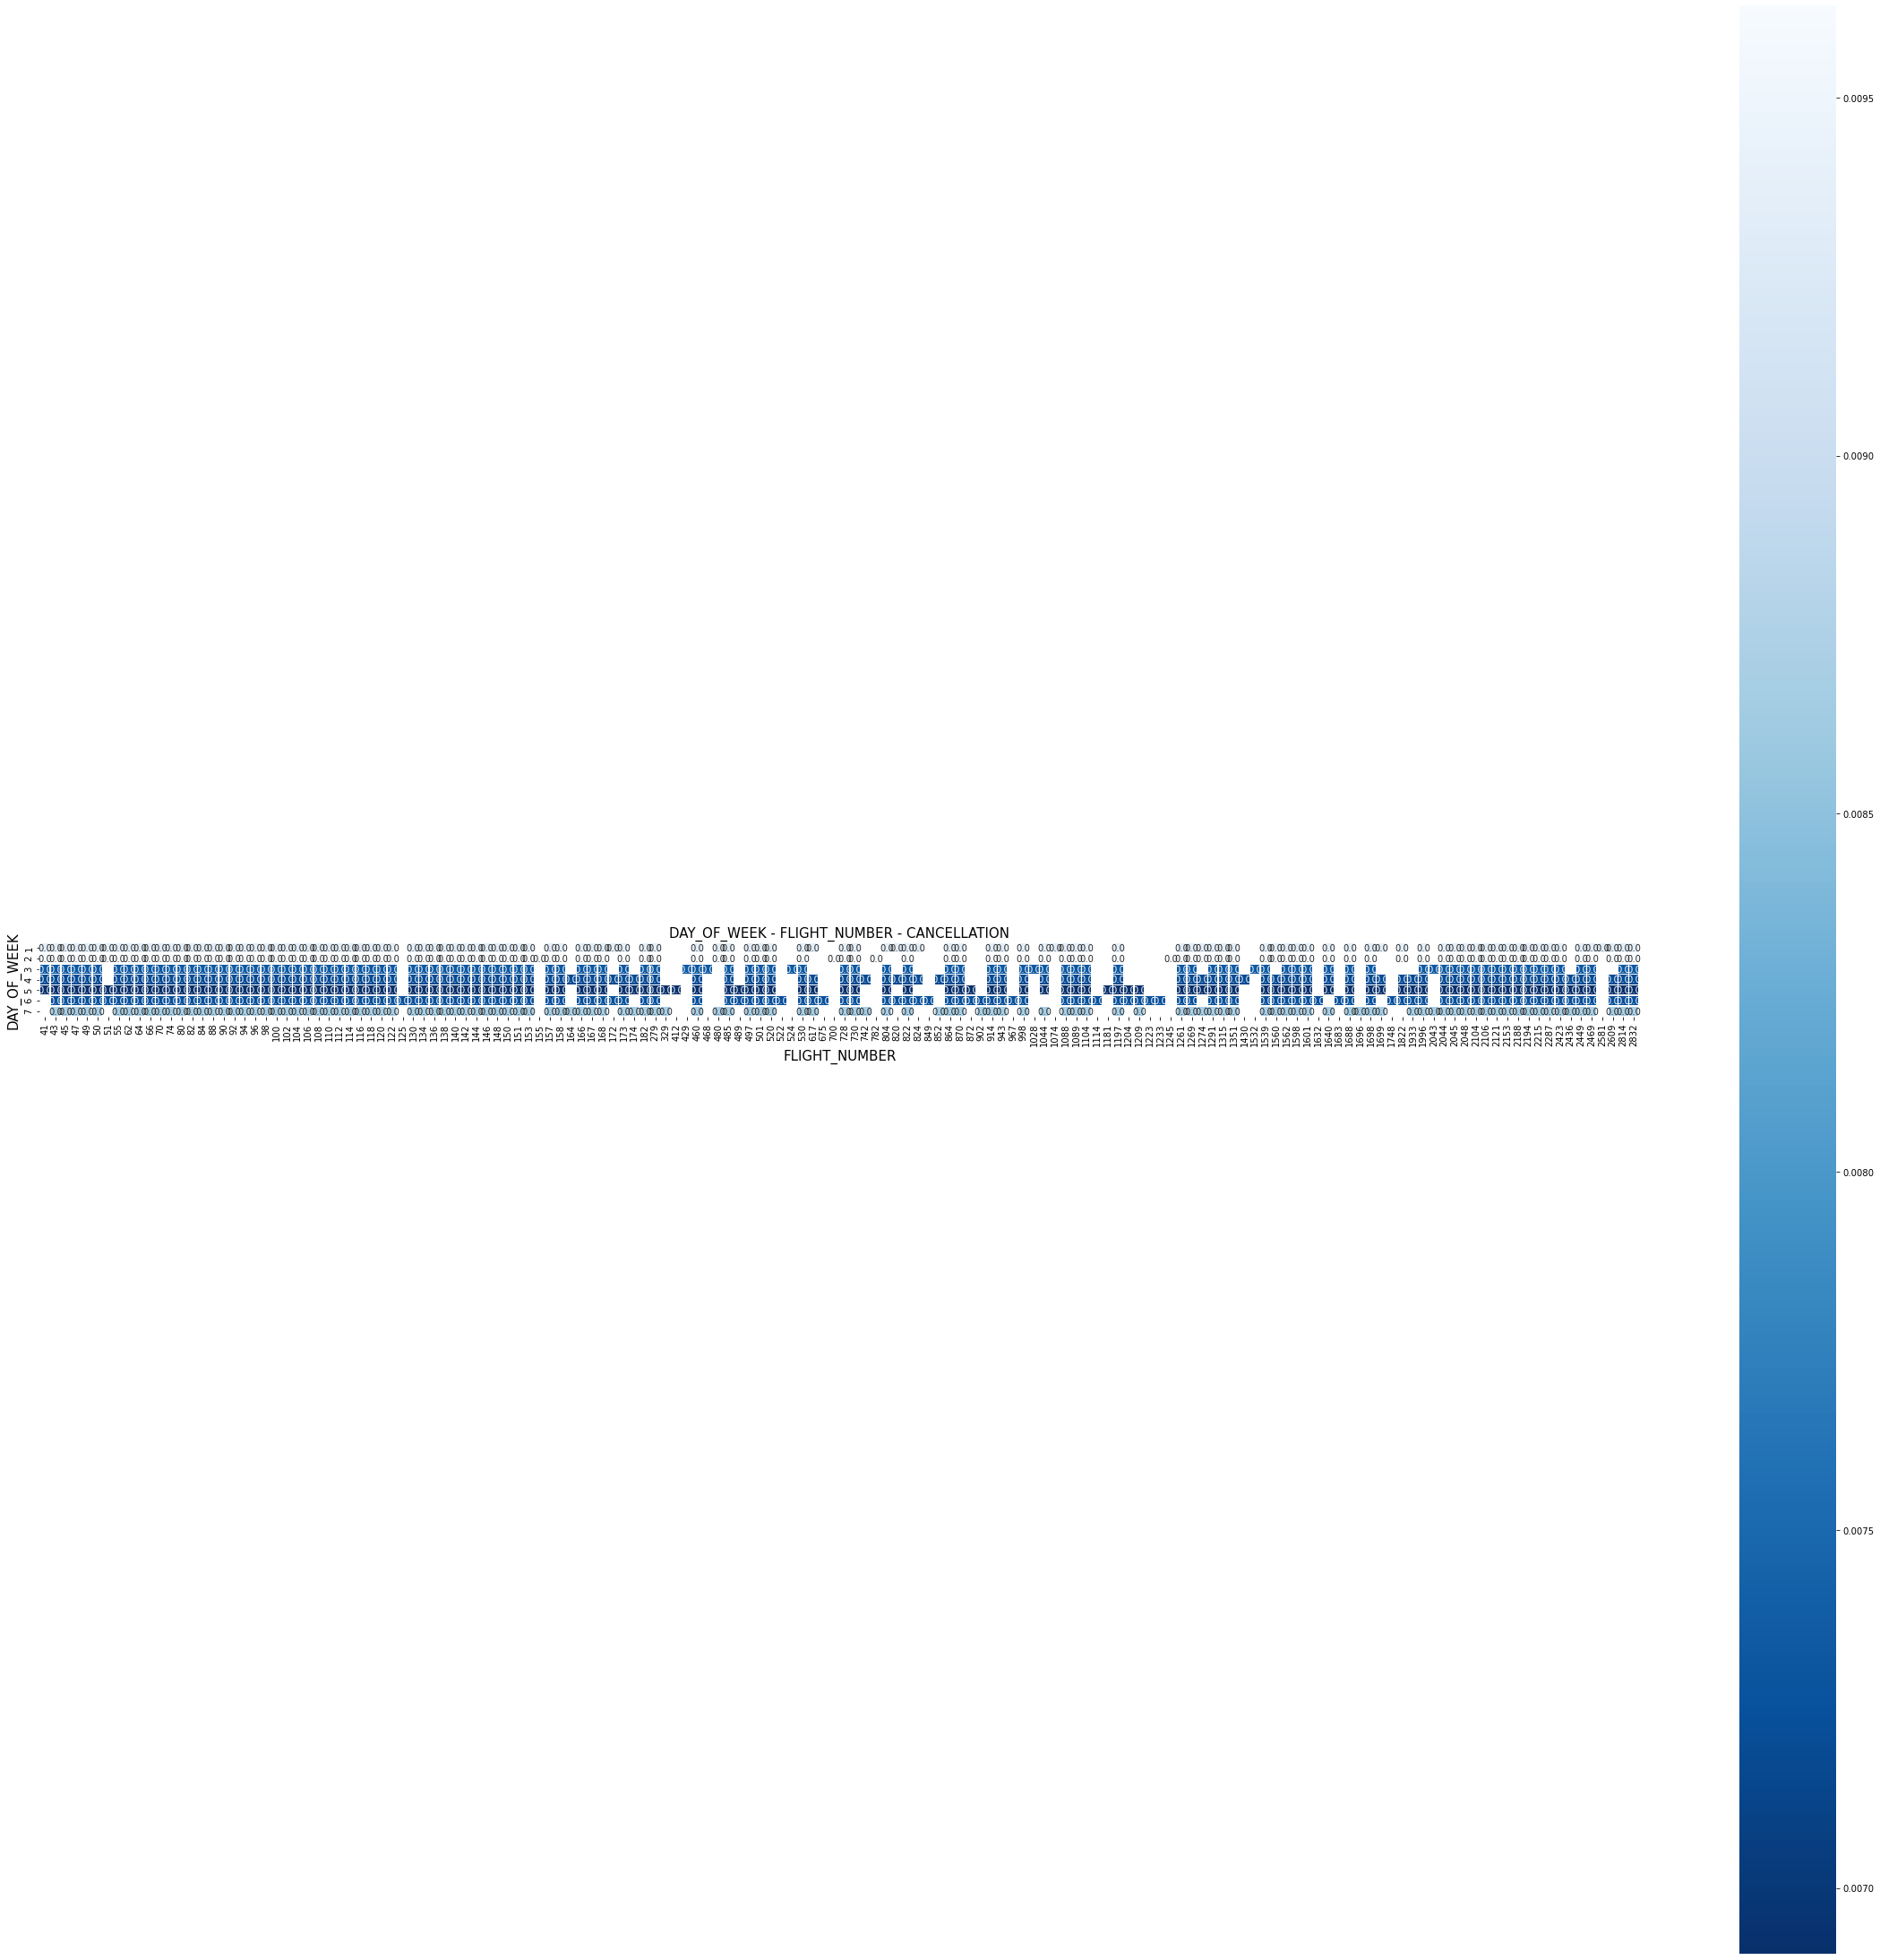

In [17]:
import matplotlib.pyplot as plt

plt.figure(figsize = (40,40))
pivot_table = the_final_df.pivot_table(index = 'DAY_OF_WEEK', columns = 'FLIGHT_NUMBER', values = 'CANCELLATION_DENSITY')
plt.xlabel('DAY_OF_WEEK', size = 15)
plt.ylabel('FLIGHT_NUMBER', size = 15)
plt.title('DAY_OF_WEEK - FLIGHT_NUMBER - CANCELLATION', size = 15)
sns.heatmap(pivot_table, annot = True, fmt = ".1f", linewidths = .5, square = True, cmap = 'Blues_r')

In [18]:
#Посчитайте и визуализируйте время задержки отправки и прибытия по трём аэропортам.
delay_df = flights_df[['DEPARTURE_DELAY', 'ARRIVAL_DELAY', 'ORIGIN_AIRPORT']]
delay_df

,DEPARTURE_DELAY,ARRIVAL_DELAY,ORIGIN_AIRPORT
0,-11.0,-22.0,ANC
1,-8.0,-9.0,LAX
2,-2.0,5.0,SFO
3,-5.0,-9.0,LAX
4,-1.0,-21.0,SEA
...,...,...,...
5819074,-4.0,-26.0,LAX
5819075,-4.0,-16.0,JFK
5819076,-9.0,-8.0,JFK
5819077,-6.0,-10.0,MCO


In [19]:
new_delay_df = delay_df[(delay_df.ORIGIN_AIRPORT == 'ANC') | (delay_df.ORIGIN_AIRPORT == 'LAX') 
                        | (delay_df.ORIGIN_AIRPORT == 'SFO')]
new_delay_df

,DEPARTURE_DELAY,ARRIVAL_DELAY,ORIGIN_AIRPORT
0,-11.0,-22.0,ANC
1,-8.0,-9.0,LAX
2,-2.0,5.0,SFO
3,-5.0,-9.0,LAX
5,-5.0,8.0,SFO
...,...,...,...
5819049,2.0,-17.0,LAX
5819054,-5.0,-45.0,LAX
5819055,-2.0,-19.0,LAX
5819068,-1.0,-19.0,LAX


In [20]:
#Определите для трёх выбранных аэропортов и визуализируйте задержки по каждой причине.
sub_delay_df = flights_df[['AIR_SYSTEM_DELAY', 'SECURITY_DELAY', 'AIRLINE_DELAY', 'LATE_AIRCRAFT_DELAY',
                           'WEATHER_DELAY', 'ORIGIN_AIRPORT', 'ARRIVAL_DELAY', 'DEPARTURE_DELAY']]
sub_delay_df = sub_delay_df[(sub_delay_df.ARRIVAL_DELAY != 0) & (sub_delay_df.DEPARTURE_DELAY != 0)]
sub_delay_df

,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY,ORIGIN_AIRPORT,ARRIVAL_DELAY,DEPARTURE_DELAY
0,NaN,NaN,NaN,NaN,NaN,ANC,-22.0,-11.0
1,NaN,NaN,NaN,NaN,NaN,LAX,-9.0,-8.0
2,NaN,NaN,NaN,NaN,NaN,SFO,5.0,-2.0
3,NaN,NaN,NaN,NaN,NaN,LAX,-9.0,-5.0
4,NaN,NaN,NaN,NaN,NaN,SEA,-21.0,-1.0
...,...,...,...,...,...,...,...,...
5819074,NaN,NaN,NaN,NaN,NaN,LAX,-26.0,-4.0
5819075,NaN,NaN,NaN,NaN,NaN,JFK,-16.0,-4.0
5819076,NaN,NaN,NaN,NaN,NaN,JFK,-8.0,-9.0
5819077,NaN,NaN,NaN,NaN,NaN,MCO,-10.0,-6.0


In [21]:
new_sub_delay_df = sub_delay_df[(sub_delay_df.ORIGIN_AIRPORT == 'ANC') | (sub_delay_df.ORIGIN_AIRPORT == 'LAX') 
                        | (sub_delay_df.ORIGIN_AIRPORT == 'SFO')]
new_sub_delay_df = new_sub_delay_df.dropna(thresh=1, subset=['AIR_SYSTEM_DELAY', 'SECURITY_DELAY',
                                                             'AIRLINE_DELAY', 'LATE_AIRCRAFT_DELAY', 'WEATHER_DELAY'])
new_sub_delay_df

,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY,ORIGIN_AIRPORT,ARRIVAL_DELAY,DEPARTURE_DELAY
92,7.0,0.0,19.0,0.0,0.0,SFO,26.0,19.0
588,0.0,0.0,55.0,0.0,0.0,SFO,55.0,76.0
983,0.0,0.0,24.0,3.0,0.0,SFO,27.0,29.0
1181,0.0,0.0,21.0,0.0,0.0,LAX,21.0,26.0
1301,1.0,0.0,14.0,7.0,0.0,SFO,22.0,21.0
...,...,...,...,...,...,...,...,...
5818177,0.0,0.0,120.0,0.0,0.0,SFO,120.0,144.0
5818498,0.0,0.0,526.0,0.0,0.0,LAX,526.0,541.0
5818916,0.0,0.0,42.0,0.0,0.0,SFO,42.0,61.0
5818925,0.0,0.0,36.0,0.0,0.0,LAX,36.0,54.0


In [22]:
delay_SFO = new_sub_delay_df[(new_sub_delay_df.ORIGIN_AIRPORT == 'SFO')]

AIR_SYSTEM = delay_SFO['AIR_SYSTEM_DELAY'].sum()
SECURITY = delay_SFO['SECURITY_DELAY'].sum()
AIRLINE = delay_SFO['AIRLINE_DELAY'].sum()
LATE_AIRCRAFT = delay_SFO['LATE_AIRCRAFT_DELAY'].sum()
WEATHER = delay_SFO['WEATHER_DELAY'].sum()
ARRIVAL = AIR_SYSTEM + SECURITY + AIRLINE + LATE_AIRCRAFT + WEATHER

new_delay_SFO = pd.DataFrame({"AIR_SYSTEM_DELAY" : [AIR_SYSTEM], "SECURITY_DELAY":[SECURITY], "AIRLINE_DELAY":[AIRLINE],
                          "LATE_AIRCRAFT_DELAY":[LATE_AIRCRAFT], 
                          "WEATHER_DELAY":[WEATHER], "ARRIVAL_DELAY" : [ARRIVAL], "ORIGIN_AIRPORT":['SFO']}, index = [1])
new_delay_SFO

,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY,ARRIVAL_DELAY,ORIGIN_AIRPORT
1,279620.0,1783.0,557272.0,860377.0,25999.0,1725051.0,SFO


In [23]:
delay_LAX = new_sub_delay_df[(new_sub_delay_df.ORIGIN_AIRPORT == 'LAX')]

AIR_SYSTEM = delay_LAX['AIR_SYSTEM_DELAY'].sum()
SECURITY = delay_LAX['SECURITY_DELAY'].sum()
AIRLINE = delay_LAX['AIRLINE_DELAY'].sum()
LATE_AIRCRAFT = delay_LAX['LATE_AIRCRAFT_DELAY'].sum()
WEATHER = delay_LAX['WEATHER_DELAY'].sum()
ARRIVAL = AIR_SYSTEM + SECURITY + AIRLINE + LATE_AIRCRAFT + WEATHER

new_delay_LAX = pd.DataFrame({"AIR_SYSTEM_DELAY" : [AIR_SYSTEM], "SECURITY_DELAY":[SECURITY], "AIRLINE_DELAY":[AIRLINE],
                          "LATE_AIRCRAFT_DELAY":[LATE_AIRCRAFT], 
                          "WEATHER_DELAY":[WEATHER], "ARRIVAL_DELAY" : [ARRIVAL], "ORIGIN_AIRPORT":['LAX']}, index = [1])
new_delay_LAX

,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY,ARRIVAL_DELAY,ORIGIN_AIRPORT
1,422274.0,3215.0,705878.0,999620.0,31595.0,2162582.0,LAX


In [24]:
delay_ANC = new_sub_delay_df[(new_sub_delay_df.ORIGIN_AIRPORT == 'ANC')]

AIR_SYSTEM =delay_ANC['AIR_SYSTEM_DELAY'].sum()
SECURITY = delay_ANC['SECURITY_DELAY'].sum()
AIRLINE = delay_ANC['AIRLINE_DELAY'].sum()
LATE_AIRCRAFT = delay_ANC['LATE_AIRCRAFT_DELAY'].sum()
WEATHER = delay_ANC['WEATHER_DELAY'].sum()
ARRIVAL = AIR_SYSTEM + SECURITY + AIRLINE + LATE_AIRCRAFT + WEATHER

new_delay_ANC = pd.DataFrame({"AIR_SYSTEM_DELAY" : [AIR_SYSTEM], "SECURITY_DELAY":[SECURITY], "AIRLINE_DELAY":[AIRLINE],
                          "LATE_AIRCRAFT_DELAY":[LATE_AIRCRAFT], 
                          "WEATHER_DELAY":[WEATHER], "ARRIVAL_DELAY" : [ARRIVAL], "ORIGIN_AIRPORT":['ANC']}, index = [1])
new_delay_ANC

,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY,ARRIVAL_DELAY,ORIGIN_AIRPORT
1,13983.0,21.0,43109.0,40572.0,3104.0,100789.0,ANC


In [25]:
summary_delay = pd.concat([new_delay_SFO, new_delay_LAX, new_delay_ANC])
summary_delay = summary_delay.reset_index().drop(['index'], axis=1)
summary_delay

,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY,ARRIVAL_DELAY,ORIGIN_AIRPORT
0,279620.0,1783.0,557272.0,860377.0,25999.0,1725051.0,SFO
1,422274.0,3215.0,705878.0,999620.0,31595.0,2162582.0,LAX
2,13983.0,21.0,43109.0,40572.0,3104.0,100789.0,ANC


<AxesSubplot:>

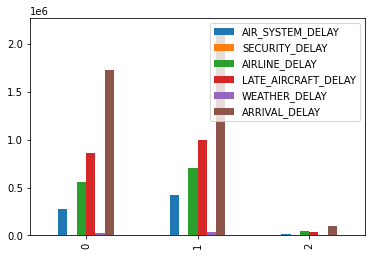

In [26]:
summary_delay.plot(kind = 'bar')

In [27]:
#Определите авиакомпанию с максимальными задержками рейсов по отправке и прибытию.
import numpy as np
sub_delay_df.ARRIVAL_DELAY = np.where(sub_delay_df.ARRIVAL_DELAY < 0 , sub_delay_df.ARRIVAL_DELAY * -1, sub_delay_df.ARRIVAL_DELAY)
sub_delay_df

sub_delay_df.DEPARTURE_DELAY = np.where(sub_delay_df.DEPARTURE_DELAY < 0 , sub_delay_df.DEPARTURE_DELAY * -1, sub_delay_df.DEPARTURE_DELAY)
sub_delay_df


arrival_df = sub_delay_df.groupby("ORIGIN_AIRPORT").sum()["ARRIVAL_DELAY"]

print(arrival_df.nlargest(arrival_df.shape[0]))

departure_df = sub_delay_df.groupby("ORIGIN_AIRPORT").sum()["DEPARTURE_DELAY"]

print(departure_df.nlargest(arrival_df.shape[0]))



ORIGIN_AIRPORT
ORD      6402669.0
ATL      5780928.0
DFW      4639299.0
DEN      3814116.0
LAX      3644868.0
           ...    
12016          3.0
11905          2.0
13502          1.0
14222          1.0
13964          0.0
Name: ARRIVAL_DELAY, Length: 930, dtype: float64
ORIGIN_AIRPORT
ORD      5095774.0
ATL      4361666.0
DFW      3743125.0
DEN      3123283.0
LAX      2911396.0
           ...    
13502          5.0
14222          5.0
11503          5.0
12016          5.0
13964          0.0
Name: DEPARTURE_DELAY, Length: 930, dtype: float64
